<a href="https://colab.research.google.com/github/natirodriguez/NatiRodriguez/blob/master/tp1_StandardScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
model = nn.Linear(X_train.shape[1], 1)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=212)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [ ]:
losses = []
for epoch in range(500):
    model.train() # Indented this line
    y_pred = model(X_train) # Indented this line
    loss = loss_fn(y_pred, y_train) # Indented this line
    optimizer.zero_grad() # Indented this line
    loss.backward() # Indented this line
    optimizer.step() # Indented this line
    scheduler.step() # Indented this line
    losses.append(loss.item()) # Indented this line

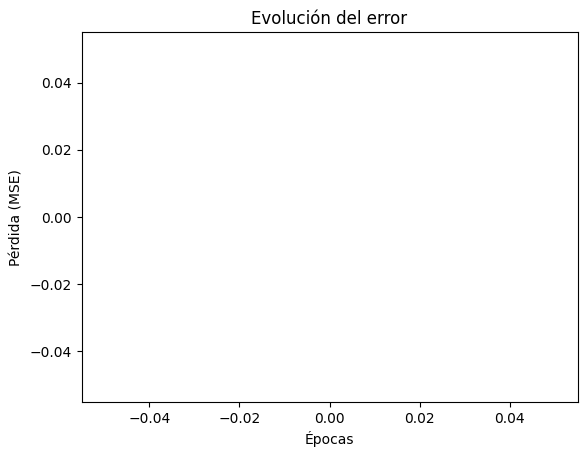

In [ ]:
plt.plot(losses)
plt.title("Evolución del error")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.show()

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Cargar datos
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

# Función para entrenar y evaluar el modelo
def train_and_evaluate(scaler):
    # Escalar los datos
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)

    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

    # Convertir a tensores
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    # Definir el modelo
    model = nn.Linear(X_train.shape[1], 1)

    # Definir la función de pérdida y el optimizador
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    # Entrenamiento
    for epoch in range(500):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluar el modelo
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        mse = mean_squared_error(y_test.numpy(), y_test_pred.numpy())

    return mse

# Comparar MinMaxScaler y StandardScaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

mse_minmax = train_and_evaluate(minmax_scaler)
mse_standard = train_and_evaluate(standard_scaler)

# Mostrar resultados
print(f'MSE con MinMaxScaler: {mse_minmax}')
print(f'MSE con StandardScaler: {mse_standard}')

# Determinar cuál es mejor
if mse_minmax < mse_standard:
    print("MinMaxScaler es mejor.")
else:
    print("StandardScaler es mejor.")

MSE con MinMaxScaler: 0.0248410664498806
MSE con StandardScaler: 0.42649373412132263
MinMaxScaler es mejor.


Learning Rate: 0.01
MSE con MinMaxScaler: 0.03460275009274483
MSE con StandardScaler: 0.5108309388160706
MinMaxScaler es mejor.



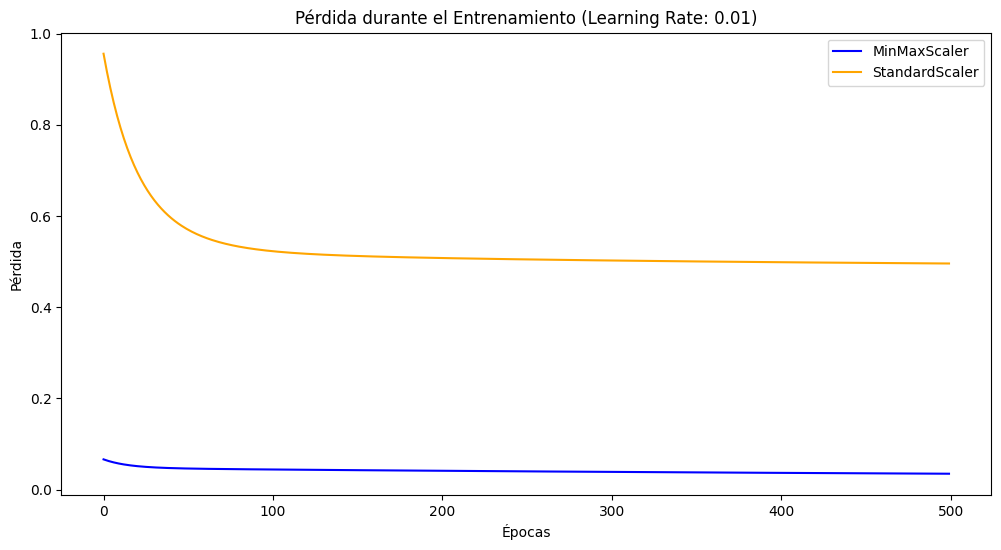

Learning Rate: 0.5
MSE con MinMaxScaler: 0.014177738688886166
MSE con StandardScaler: 0.503104567527771
MinMaxScaler es mejor.



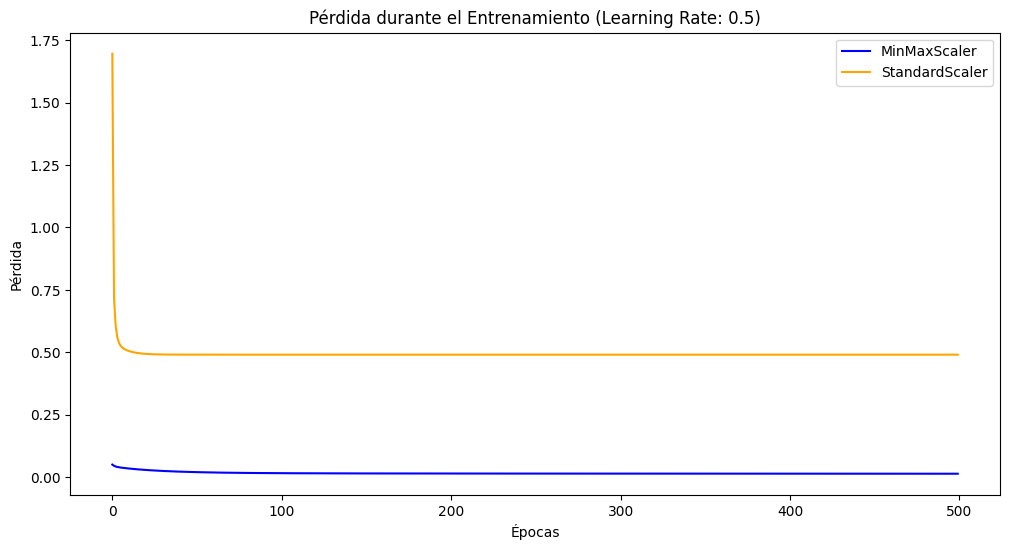

Learning Rate: 3
MSE con MinMaxScaler: 0.18806102871894836
MSE con StandardScaler: 1.0205365419387817
MinMaxScaler es mejor.



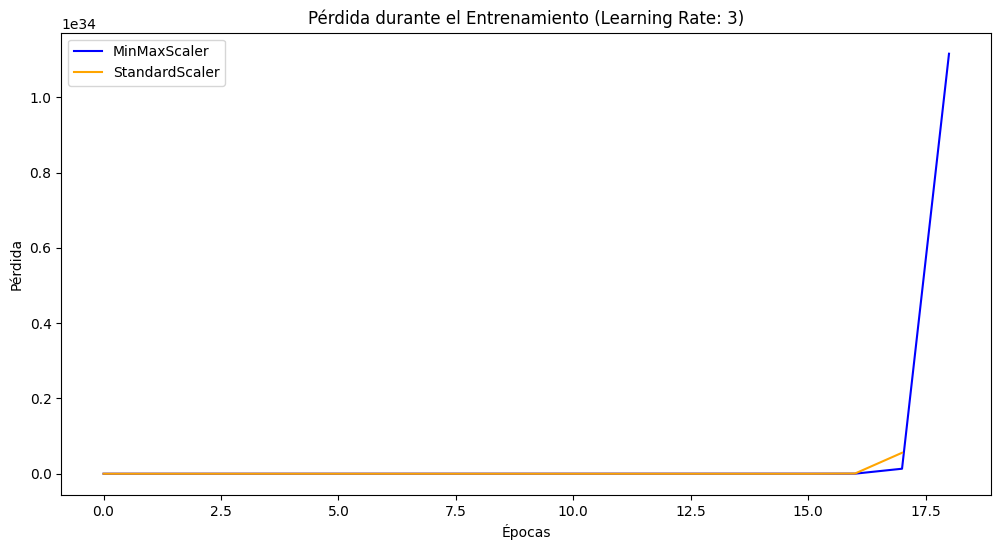

Learning Rate: 12
MSE con MinMaxScaler: 0.1956729292869568
MSE con StandardScaler: 1.0226696729660034
MinMaxScaler es mejor.



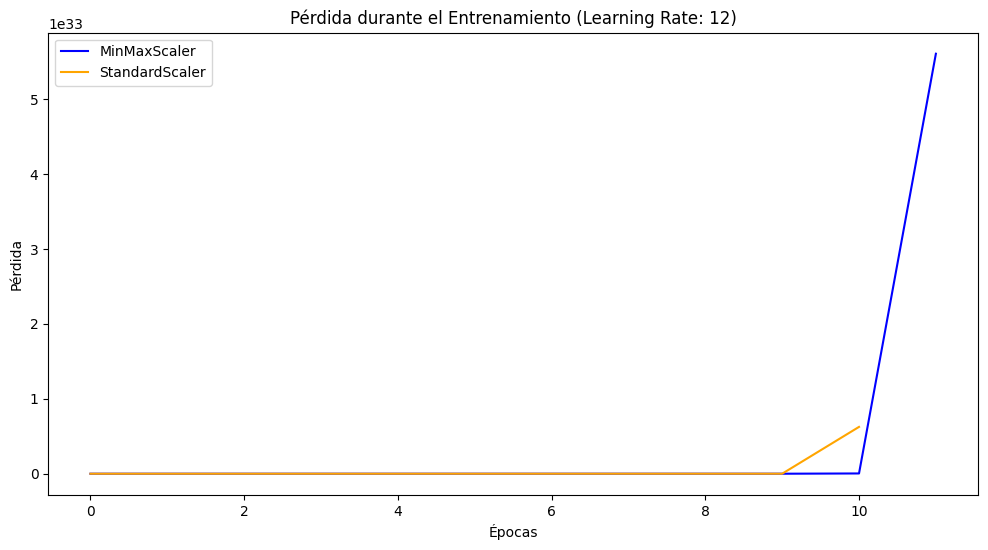

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

# Agregar ruido a los datos de salida
np.random.seed(0)  # Para reproducibilidad
noise = np.random.normal(0, 0.5, y.shape)  # Ruido con media 0 y desviación estándar 0.5
y_noisy = y + noise  # Datos de salida con ruido

# Función para entrenar y evaluar el modelo
def train_and_evaluate(scaler, learning_rate):
    # Escalar los datos
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y_noisy)  # Usar y_noisy en lugar de y

    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

    # Convertir a tensores
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    # Definir el modelo
    model = nn.Linear(X_train.shape[1], 1)

    # Definir la función de pérdida y el optimizador
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Entrenamiento
    losses = []  # Para almacenar las pérdidas
    for epoch in range(500):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())  # Guardar la pérdida

    # Evaluar el modelo
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)

        # Check for NaN in y_test and y_test_pred and replace with 0
        y_test_np = y_test.numpy()
        y_test_pred_np = y_test_pred.numpy()

        y_test_np = np.nan_to_num(y_test_np) # Replace NaN with 0 in y_test
        y_test_pred_np = np.nan_to_num(y_test_pred_np) # Replace NaN with 0 in y_test_pred

        mse = mean_squared_error(y_test_np, y_test_pred_np)

    return mse, losses

# Comparar MinMaxScaler y StandardScaler con diferentes tasas de aprendizaje
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Tasas de aprendizaje especificadas
learning_rates = [0.01, 0.5, 3, 12]
results = {}

for lr in learning_rates:
    mse_minmax, losses_minmax = train_and_evaluate(minmax_scaler, lr)
    mse_standard, losses_standard = train_and_evaluate(standard_scaler, lr)
    results[lr] = (mse_minmax, mse_standard, losses_minmax, losses_standard)

# Mostrar resultados
for lr, (mse_minmax, mse_standard, losses_minmax, losses_standard) in results.items():
    print(f'Learning Rate: {lr}')
    print(f'MSE con MinMaxScaler: {mse_minmax}')
    print(f'MSE con StandardScaler: {mse_standard}')
    if mse_minmax < mse_standard:
        print("MinMaxScaler es mejor.")
    else:
        print("StandardScaler es mejor.")
    print()

    # Graficar las pérdidas
    plt.figure(figsize=(12, 6))
    plt.plot(losses_minmax, label='MinMaxScaler', color='blue')
    plt.plot(losses_standard, label='StandardScaler', color='orange')
    plt.title(f'Pérdida durante el Entrenamiento (Learning Rate: {lr})')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()